In [109]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab06.ok')

Assignment: lab06
OK, version v1.13.11



# Lab 6: Transformations and KDEs

### Objective
In this lab you will get some practice plotting, applying data transformations, and working with kernel density estimators.  We will be working with data from the World Bank containing various statistics for countries and territories around the world. 

**This assignment should be completed and submitted by 11:59 PM on Monday Sep 30, 2019.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here*

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Loading Data

In [4]:
import ds100_utils

data_dir = 'data'
data_url = 'http://www.ds100.org/fa19/assets/datasets/lab06_data.zip'
file_name = 'lab06_data.zip'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, file=file_name, data_dir=data_dir)
print(f'Located at {dest_path}')

Downloading... Done!
Located at data/lab06_data.zip


Here, the ZIP archive contains a data folder with a few files in it. This is similar to what you had in lab 3.

To get the CSV files we want to work with, directly extract the data folder in the zip archive into the `data` directory.

In [5]:
my_zip = zipfile.ZipFile(dest_path, 'r')
my_zip.extractall(data_dir)

Now, let us load some World Bank data into a pandas.DataFrame object named ```wb```.

In [6]:
wb = pd.read_csv("data/data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns.  Take a look:

In [7]:
list(wb.columns)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Part 1: Scaling

In the first part of this assignment we will look at the distribution of values for female adult literacy rate as well as the gross national income per capita. The code below creates a copy of the dataframe that contains only the two Series we want, and then drops all rows that contain null values in either column.

**Note:** For this lab we are dropping null values without investigating them further. However, this is generally not the best practice and can severely affect our analyses.

In [8]:
#creates a dataframe with the appropriate index
df = pd.DataFrame(index=wb.index)

#copies the Series we want
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']

#the line below drops all records that have a NaN value in either column
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 147


In [8]:
df.head(5)

,lit,inc
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
Angola,60.0,3440.0
Antigua and Barbuda,99.0,13400.0


## Question 1a

Suppose we wanted to build a histogram of our data to understand the distribution of literacy rates and income per capita individually. Last week, we saw that `countplot` creates histograms from categorical data. 

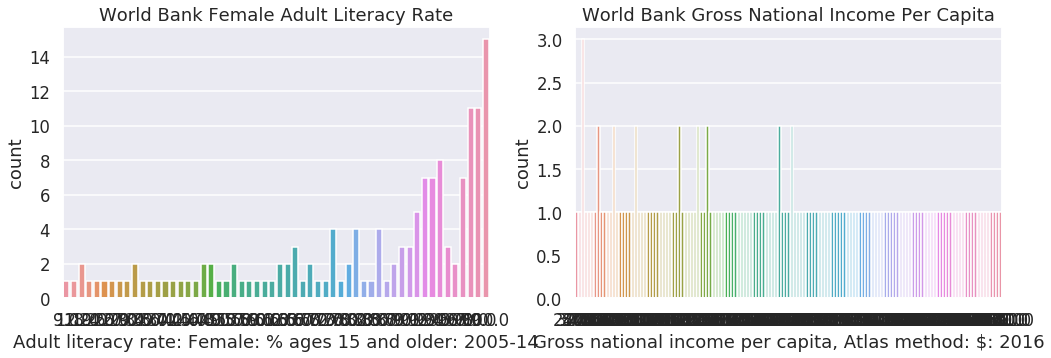

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['lit'])
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.countplot(df['inc'])
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

In [61]:
df['lit'].value_counts()

100.0    15
98.0     11
99.0     11
94.0      8
92.0      7
97.0      7
93.0      7
91.0      5
85.0      4
73.0      4
80.0      4
65.0      3
89.0      3
90.0      3
95.0      3
30.0      2
47.0      2
87.0      2
62.0      2
18.0      2
63.0      2
48.0      2
78.0      2
96.0      2
53.0      2
67.0      2
26.0      1
66.0      1
24.0      1
57.0      1
60.0      1
68.0      1
83.0      1
29.0      1
36.0      1
82.0      1
19.0      1
37.0      1
34.0      1
61.0      1
42.0      1
41.0      1
9.0       1
49.0      1
58.0      1
46.0      1
35.0      1
25.0      1
51.0      1
27.0      1
86.0      1
59.0      1
45.0      1
12.0      1
72.0      1
76.0      1
Name: lit, dtype: int64

In the cell below, explain why `countplot` is NOT the right tool for visualizing the distribution of our data. Discuss with your neighbors as well!

<!--
BEGIN QUESTION
name: q1a
-->

Countplot is not the right tool because for the GNI per capita data, the spread of the count is not discernable at all given the different independent variables. And there are also suddent spikes in the count in the GNI data.

## Question 1b

In the cell below, create a plot of literacy rate and income per capita using the `distplot` function. As above, you should have two subplots, where the left subplot is literacy, and the right subplot is income. When you call `distplot`, set the `kde` parameter to false, e.g. `distplot(s, kde=False)`.

Don't forget to title the plot and label axes!

**Hint:** *Copy and paste from above to start.*

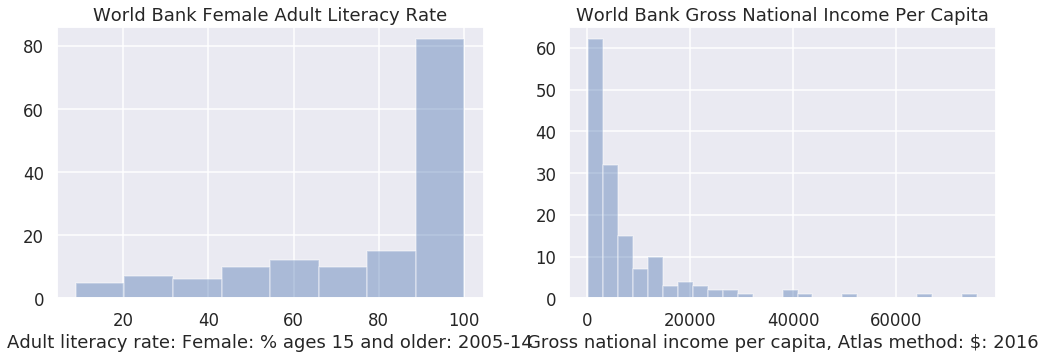

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['lit'], kde=False)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.distplot(df['inc'], kde=False)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

You should see histograms that show the counts of how many data points appear in each bin. `distplot` uses a heuristic called the Freedman-Diaconis rule to automatically identify the best bin sizes, though it is possible to set the bins yourself (we won't).

In the cell below, try creating the exact same plot again, but this time set the `kde` parameter to False and the `rug` parameter to True.

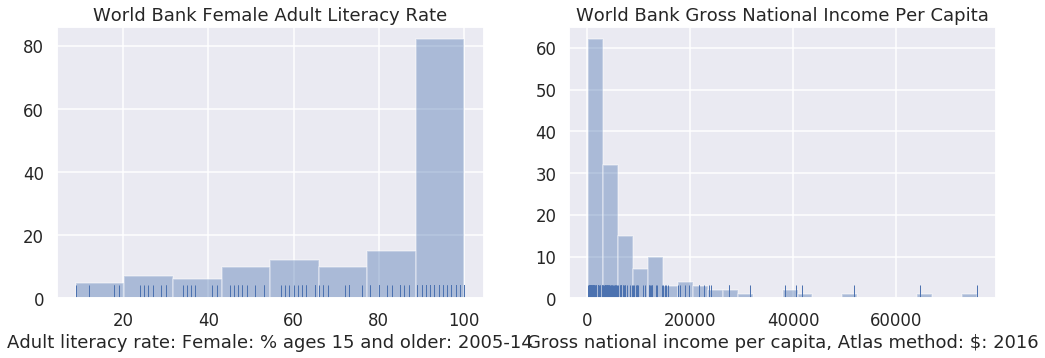

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['lit'], kde=False, rug=True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.distplot(df['inc'], kde=False, rug=True)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

Above, you should see little lines at the bottom of the plot showing the actual data points. In the cell below, let's do one last tweak and plot with the `kde` parameter set to True.

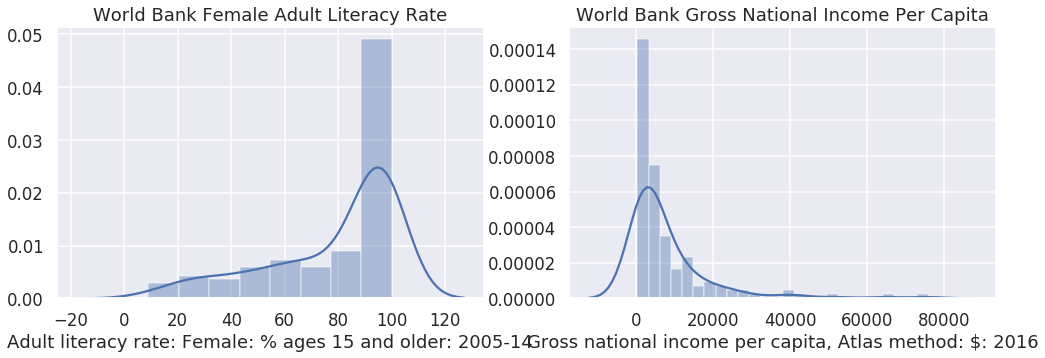

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['lit'], kde=True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')

plt.subplot(1,2,2)
sns.distplot(df['inc'], kde=True)
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. 

Observations:
* You'll also see that the y-axis value is no longer the count. Instead it is a value such that the total area under the KDE curve is 1 *and* the total area in the histogram is 1. The KDE is a smooth estimate of the distribution of the given variable.

* The KDE is just an estimate, as is the histogram. Notice that it assigns a large fraction of its area to values in the 100-120% literacy rate. This is definitely an impossibility.

We'll talk more about KDEs later in this lab.

## Question 1c

Looking at the income data, it is difficult to see the distribution among low income countries because they are all scrunched up at the left side of the plot. The KDE also has a problem where the density function has a lot of area below 0. 

When we logarithmically transform the `inc` data that gives us a more symmetric distribution of values. This can make it easier to see patterns.

In addition, summary statistics like the mean and standard deviation (square-root of the variance) are more stable with symmetric distributions.

In the cell below, make a distribution plot of `inc` with the data transformed using `np.log10` and `kde=True`. Be sure to correct the axis label using `plt.xlabel`. If you want to see the exact counts, just set `kde=False`.

In [4]:
plt.figure(figsize=(15,5))

sns.distplot(np.log10(df['lit']), kde=True)
plt.xlabel("Logarithmic transformation of Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.title('World Bank Female Adult Literacy Rate')
plt.legend(['']);
plt.show()

NameError: name 'plt' is not defined

When a distribution has a long right tail, a log-transformation often does a good job of symmetrizing the distribution, as it did here.  Long right tails are common with variables that have a lower limit on the values. 

On the other hand, long left tails are common with distributions of variables that have an upper limit, such as percentages (can't be higher than 100%) and GPAs (can't be higher than 4).  That is the case for the literacy rate. Typically taking a power-transformation such 
as squaring or cubing the values can help symmetrize the left skew distribution.

In the cell below, make a distribution plot of `lit` with the data transformed using a power, i,e., raise `lit` to the 2nd, 3rd, and 4th power. Select the transformation that you think is best. Be sure to set `kde=True` and correct the axis label using `plt.xlabel`. 

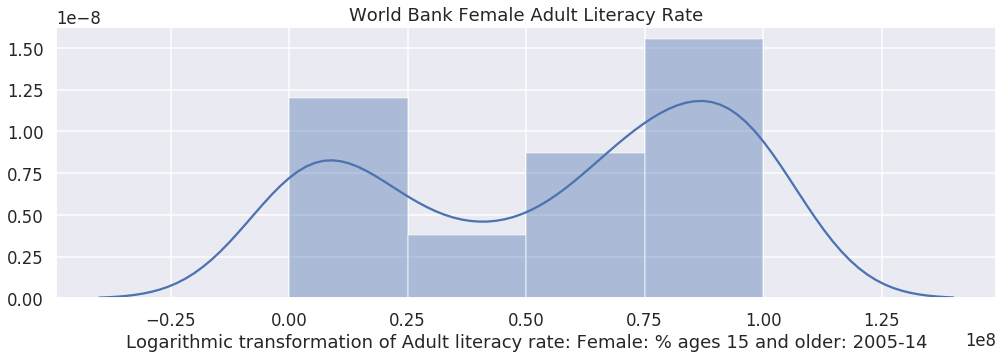

In [17]:
plt.figure(figsize=(15,5))

sns.distplot((df['lit'])**4, kde=True)
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14 taken to the 4th pwoer")
plt.title('World Bank Female Adult Literacy Rate')

plt.show()

## Question 1d

If we what to examine the relationship between the female adult literacy rate and the gross national income per capita is, we need to make a scatter plot. 


In the cell below, create a scatter plot of income per capita and literacy rate using the `sns.scatterplot` function. Make  sure to label both axes using `plt.xlabel` and `plt.ylabel`.

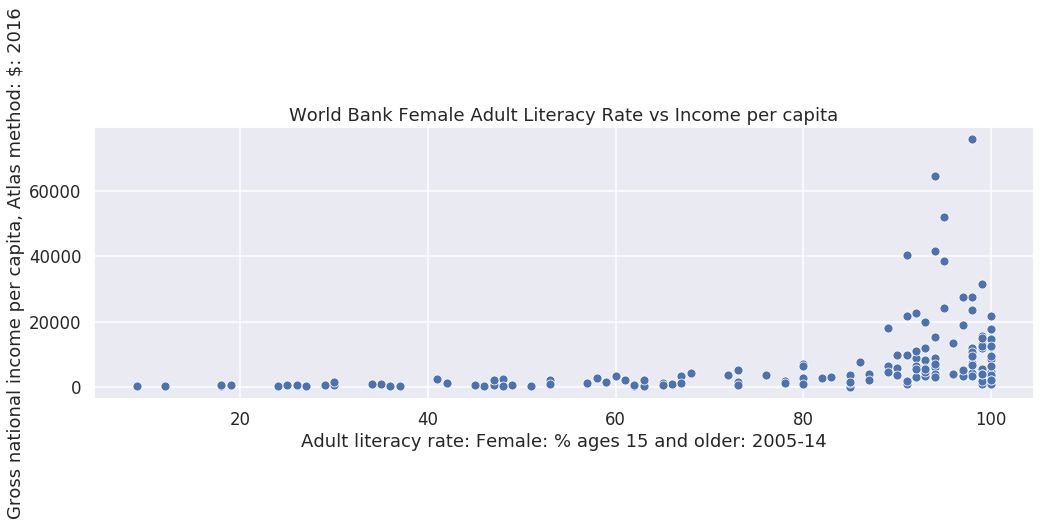

In [39]:
plt.figure(figsize=(15,5))


sns.scatterplot(x=df['lit'], y=df['inc'])
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.ylabel("Gross national income per capita, Atlas method: $: 2016")
plt.title('World Bank Female Adult Literacy Rate vs Income per capita')

plt.show()

We can better assess the relatioship between two variables when they have been straightened because it is easier for us to recognize linearity.

What transformation does the bulge rule suggest for a scatter plot with this shape? 

In the cell below, create a scatter plot of log-transformed income per capita against literacy rate. Make  sure to label both axes using `plt.xlabel` and `plt.ylabel`.

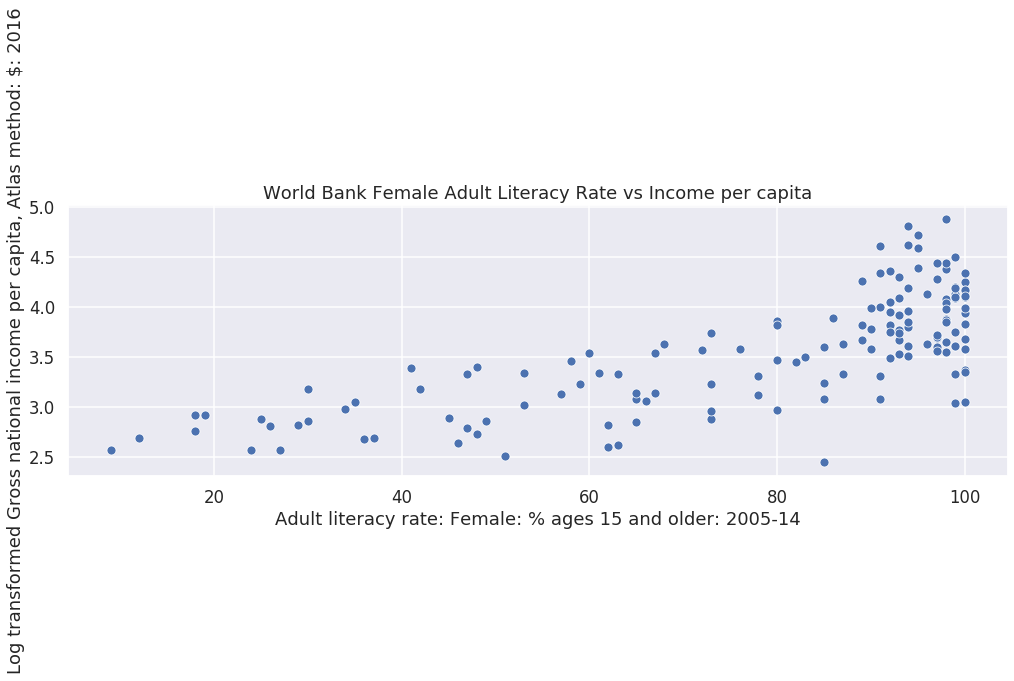

In [43]:
# A log transformation would make the data look better

plt.figure(figsize=(15,5))


sns.scatterplot(x=df['lit'], y=np.log10(df['inc']))
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.ylabel("Log transformed Gross national income per capita, Atlas method: $: 2016")
plt.title('World Bank Female Adult Literacy Rate vs Income per capita')

plt.show()

This scatter plot looks better. The relationship is closer to linear.

We can think of the log-linear relationship between x and y, as follows: a constant change in x corresponds to a percent (scaled) change in y.

We can also see that the long left tail of literacy is represented in this plot by a lot of the points being bunched up near 100. Try squaring literacy and logging income. Does the plot look better? 

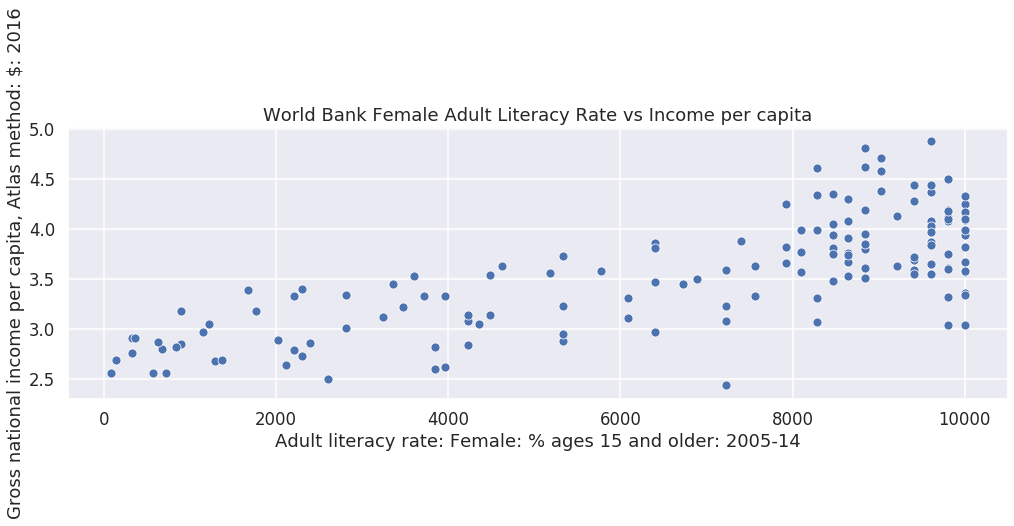

In [45]:
plt.figure(figsize=(15,5))

# The plot looks better because it is more linear

sns.scatterplot(x=df['lit']**2, y=np.log10(df['inc']))
plt.xlabel("Adult literacy rate: Female: % ages 15 and older: 2005-14")
plt.ylabel("Gross national income per capita, Atlas method: $: 2016")
plt.title('World Bank Female Adult Literacy Rate vs Income per capita')

plt.show()

Choosing the best transformation for a relationship is often a balance between keeping the model simple and straightening the model. We will discuss this topic when we cover modeling.

# Part 2: Kernel Density Estimation

In this part of the lab you will develop a deeper understanding of how kernel destiny estimation works. This section assumes you watched lecture 6 and are familiar with the basic idea of the KDE.

Suppose we have 3 data points with values 2, 4, and 9. We can compute the (useless) histogram as shown below.

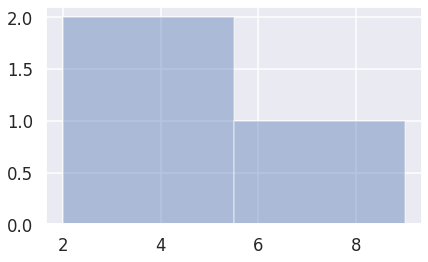

In [46]:
data3pts = np.array([2, 4, 9])
sns.distplot(data3pts, kde = False);

By setting `kde=True`, we can see a kernel density estimate of the data.

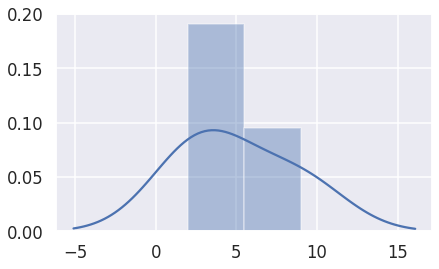

In [47]:
sns.distplot(data3pts, kde = True);

One question you might be wondering is how the kernel density estimator decides how "wide" each point should be. It turns out this is a parameter you can set called `bw`, which stands for bandwith. For example, the code below gives a bandwith value of 0.5 to each data point. You'll see the resulting kde is quite different. Try experimenting with different values of bandwidth and see what happens.

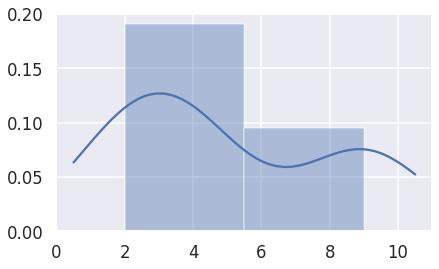

In [48]:
sns.distplot(data3pts, kde = True, kde_kws = {"bw": 0.5});

## Question 2a

As mentioned in class, the kernel density estimate is just the sum of a bunch of copies of the kernel, each centered on our data points. For those of you familiar with the idea of "convolution" (not in scope for this class), the KDE is simply the convolution of the kernel with the data. The default kernel used by the `distplot` function is the Guassian kernel, given by:

$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

In Python code, this function is given as below, where `alpha` is the parameter $\alpha$, `z` is the x coordinate of the center of the Gaussian (i.e. a data point), and `x` is the variable which represents a single data point in our set of data points.

In [49]:
def gaussian_kernel(alpha, x, z):
    return 1.0/np.sqrt(2. * np.pi * alpha**2) * np.exp(-(x - z) ** 2 / (2.0 * alpha**2))

For example, we can plot the gaussian kernel centered on $x$ coordinate 9 with $\alpha$ = 0.5 as below: 

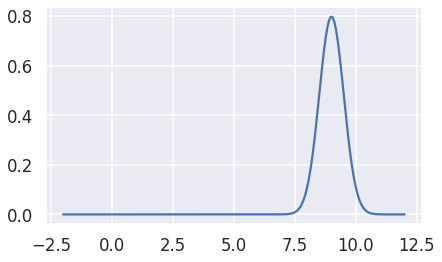

In [50]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, kde_curve);

In the cell below, plot the 3 kernel density functions corresponding to our 3 data points on the same axis. Use an `alpha` value of 0.5. Recall that our three data points are 2, 4, and 9. 

**Note:** Make sure to normalize your kernels! This means that the area under each of your kernels should be $\frac{1}{3}$ since there are three data points.

You don't have to use the following hints, but they might be helpful in simplifying your code.

**Hint:** The `gaussian_kernel` function can take a numpy array as an argument for `z`.

**Hint:** To plot multiple plots at once, you can use `plt.plot(xs, y)` with a two dimensional array as `y`.

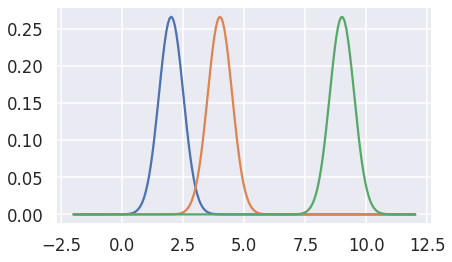

In [55]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
z=[2,4,9]
kde_curve = [gaussian_kernel(alpha, x, z)/3 for x in xs]
plt.plot(xs, kde_curve);

In the cell below, create a plot showing the sum of all three of the kernels above. Your plot should closely resemble the kde shown when you called `distplot` function with bandwidth 0.5 earlier. The area under your final curve should be 1 since the area under each of the three normalized kernels is $\frac{1}{3}$.

**Hint:** Consider using `np.sum` with the argument `axis = 1`.* For a two dimensional numpy array, this will sum the array across the rows. For an example, see the "along an axis" entry in the numpy [glossary](https://docs.scipy.org/doc/numpy-1.13.0/glossary.html).

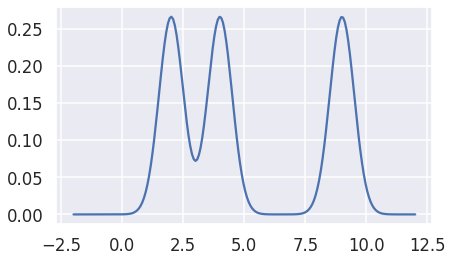

In [61]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
z=[2,4,9]
kde_curve = [gaussian_kernel(alpha, x, z)/3 for x in xs]
kde_curve_sum = np.sum(kde_curve,axis=1)
plt.plot(xs, kde_curve_sum);

## Question 2b

Recall that earlier we plotted the kernel density estimation for the logarithm of the income data, as shown again below.

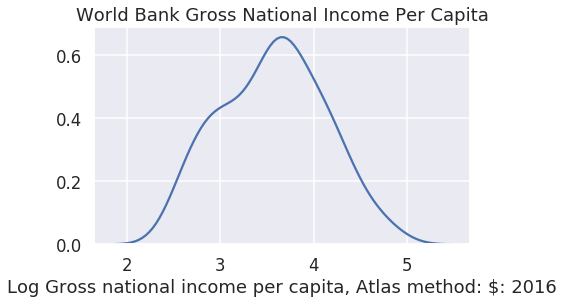

In [62]:
ax = sns.distplot(np.log10(df['inc']), hist=False)
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');

In the cell below, make a similar plot using your technique from question 2a. Give an estimate of the $\alpha$ value chosen by the `sns.distplot` function by tweaking your `alpha` value until your plot looks almost the same. Make sure to normalize your graph, so the area under the curve is 1.

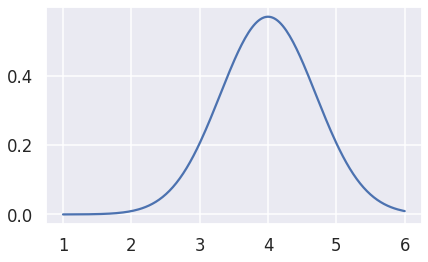

In [72]:
xs = np.linspace(1, 6, 200)

alpha=0.7
kde_curve = [gaussian_kernel(alpha, x, 4) for x in xs]
plt.plot(xs, kde_curve);n

# An alpha value of a = 0.7 gives a plot that looks almost the same

## Question 2c

In your answers above, you hard coded a lot of your work. In this problem, you'll build a more general kernel density estimator function.

Implement the KDE function which computes:

$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where $z_i$ are the data, $\alpha$ is a parameter to control the smoothness, and $K_\alpha$ is the kernel density function passed as `kernel`.

<!--
BEGIN QUESTION
name: q2c
-->

In [117]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function with 3 parameters: alpha, x, data
        alpha: the smoothing parameter to pass to the kernel
        x: a single query point (in one dimension)
        data: a numpy array of data points

    Returns:
        The smoothed estimate at the query point x
    """    
    return np.sum(kernel(alpha,x,data))/len(data)

In [118]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Assuming you implemented `kde` correctly, the code below should generate the `kde` of the log of the income data as before.

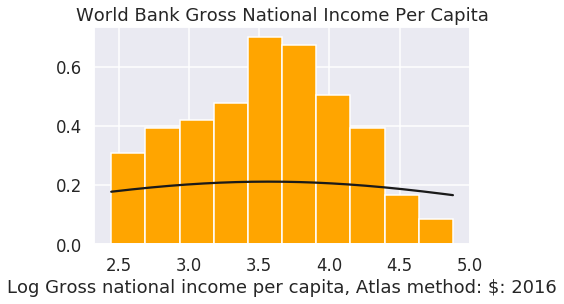

In [121]:
df['trans_inc'] = np.log10(df['inc'])
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], density=True, color='orange')
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');
plt.plot(xs, curve, 'k-');

And the code below should show a 3 x 3 set of plots showing the output of the kde for different `alpha` values.

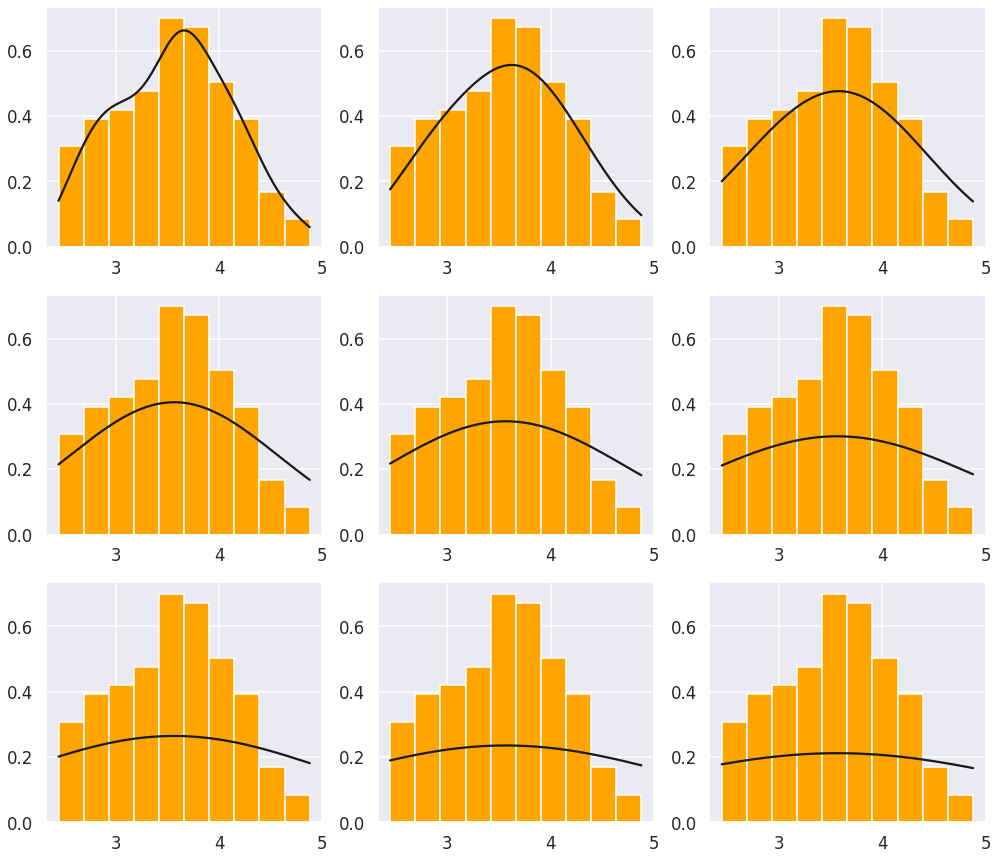

In [125]:
plt.figure(figsize=(15,15))
alphas = np.arange(0.2, 2.0, 0.2)
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i+1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], density=True, color='orange')
    plt.plot(xs, curve, 'k-')
plt.show()

Let's take a look at another kernel, the Boxcar kernel.

In [123]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

Run the cell below to enable interactive plots. It should give you a green 'OK' when it's finished.

In [124]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Now, we can plot the Boxcar and Gaussian kernel functions to see what they look like.

In [126]:
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=1.0), Output()), _dom_classes=…

Using the interactive plot below compare the the two kernel techniques:  (Generating the KDE plot is slow, so you may expect some latency after you move the slider)

In [128]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], density=True, color='orange')
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1));

interactive(children=(FloatSlider(value=0.25, description='alpha_g', max=0.5, min=0.01, step=0.01), FloatSlide…

Briefly compare and contrast the Gaussian and Boxcar kernels in the cell below. How do the two kernels relate with each other for the same alpha value?

The Gaussian curve is much smoother compared to the boxcar curve. However, the boxcar curve seems to follow the the shape of the distribution plots better. When the two kernels have the same alpha value, they are  relatively the same, however, the boxcar seems to be more accurate.

**Congrats!** You are finished with this assignment.

# Make sure to complete the Vitamin on Gradescope by 11:59 PM on Monday!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [60]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Saved 'lab06.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: emansishah@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: NvuwLFgxXkORW6tjHOhXlfhgwt4Aq3
Successfully logged in as emansishah@berkeley.edu
Submit... 100% complete
Submission successful for user: emansishah@berkeley.edu
URL: https://okpy.org/cal/data100/fa19/lab06/submissions/q7wyJR

